Частина третя: Аналіз датасет c Kaggle.com

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from google.colab import files

In [3]:
url = "https://raw.githubusercontent.com/OlegAndrienko/HW2_DS/main/bestsellers.csv"
data = pd.read_csv(url)
print(data.head(5))
print(data.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


In [4]:
#скільки книг зберігає дані датасет?
print(f"Cкільки книг зберігає дані датасет?: {data.shape[0] - 1}")

data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(data.head(5))

Cкільки книг зберігає дані датасет?: 549
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [5]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
spaces = data.isna().sum()
print(spaces)

counter = 0
for i in spaces:
    if i > 0:
        counter += 1
if counter > 0:
    print(f"Відповідь: Чи є в якихось змінних пропуски?: Так")
else:
    print(f"Відповідь: Чи є в якихось змінних пропуски?: Ні")


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: Чи є в якихось змінних пропуски?: Ні


In [6]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(data["genre"].unique())
unique_genre = list(data["genre"].unique())
print(f"Відповідь: Які є унікальні значення в колонці genre?: {unique_genre}")

['Non Fiction' 'Fiction']
Відповідь: Які є унікальні значення в колонці genre?: ['Non Fiction', 'Fiction']


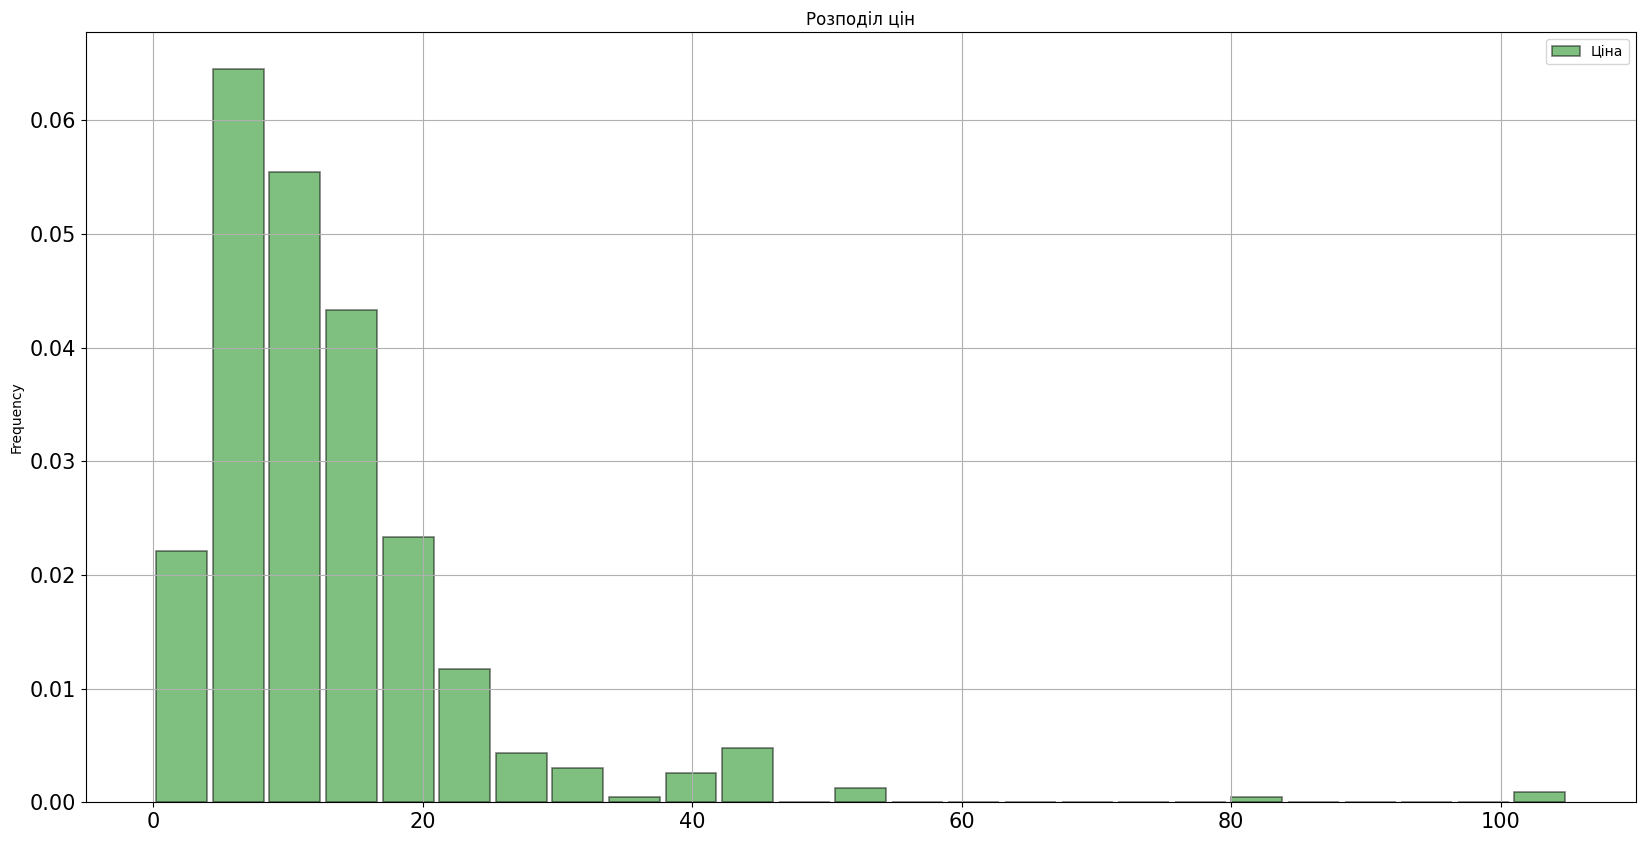

In [7]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
data["price"].plot(kind="hist",
                    bins=25,
                    figsize=(20, 10),
                    color="green",
                    edgecolor="black",
                    linewidth=1.2,
                    alpha=0.5,
                    grid=True,
                    title="Розподіл цін",
                    fontsize=15,
                    legend=True,
                    label="Ціна",
                    density=True,
                    cumulative=False,
                    histtype="bar",
                    align="mid",
                    orientation="vertical",
                    rwidth=0.9,
                    xlabel="Ціна",
                    layout=(3, 1),

)
plt.show()


In [8]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(f"Максимальна ціна: {data['price'].max()}")
print(f"Мінімальна ціна: {data['price'].min()}")
print(f"Середня ціна: {data['price'].mean()}")
print(f"Медіанна ціна: {data['price'].median()}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [9]:
#Який рейтинг у датасеті найвищий?
print(f"Який рейтинг у датасеті найвищий?: {data['user_rating'].max()}")

Який рейтинг у датасеті найвищий?: 4.9


In [10]:
#Скільки книг мають найвищий рейтинг?
print(f"Скільки книг мають найвищий рейтинг?: {data[data['user_rating'] == data['user_rating'].max()].shape[0]}")

Скільки книг мають найвищий рейтинг?: 52


In [11]:
#Яка книга має найбільше відгуків?
print(f"Яка книга має найбільше відгуків?: {data[data['reviews'] == data['reviews'].max()]['name'].values[0]}")

Яка книга має найбільше відгуків?: Where the Crawdads Sing


In [12]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
top_50 = data[(data['year'] == 2015) & (data['user_rating'] <= 50)]
print(top_50)
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?: {top_50[top_50['price'] == top_50['price'].max()]['name'].values[0]}")

                                                  name  \
16   Adult Coloring Book: Stress Relieving Animal D...   
17      Adult Coloring Book: Stress Relieving Patterns   
18   Adult Coloring Books: A Coloring Book for Adul...   
21                         All the Light We Cannot See   
23   American Sniper: The Autobiography of the Most...   
28                        Baby Touch and Feel: Animals   
29            Balance (Angie's Extreme Stress Menders)   
34   Being Mortal: Medicine and What Matters in the...   
35                            Between the World and Me   
54   Creative Haven Creative Cats Coloring Book (Ad...   
55   Creative Haven Owls Coloring Book (Adult Color...   
63                      Dear Zoo: A Lift-the-Flap Book   
89   Dover Creative Haven Art Nouveau Animal Design...   
99   Enchanted Forest: An Inky Quest and Coloring b...   
111                                    First 100 Words   
123                               Giraffes Can't Dance   
132           

In [13]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
top_50_fiction = data[(data['year'] == 2010) & (data['genre'] == "Fiction")]
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?: {top_50_fiction.shape[0]}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?: 20


In [14]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
top_50_4_9 = data[(data['year'] == 2010) | (data['year'] == 2011)]
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?: {top_50_4_9[top_50_4_9['user_rating'] == 4.9].shape[0]}")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?: 1


In [15]:
#відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)
top_50_2015 = data[(data['year'] == 2015) & (data['price'] < 8)]
print(top_50_2015.sort_values(by="price", ascending=False))

                                                  name              author  \
253              Old School (Diary of a Wimpy Kid #10)         Jeff Kinney   
16   Adult Coloring Book: Stress Relieving Animal D...  Blue Star Coloring   
376  The Four Agreements: A Practical Guide to Pers...     Don Miguel Ruiz   
17      Adult Coloring Book: Stress Relieving Patterns  Blue Star Coloring   
224                                   Love You Forever       Robert Munsch   
28                        Baby Touch and Feel: Animals                  DK   
478                        The Very Hungry Caterpillar          Eric Carle   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
123                               Giraffes Can't Dance       Gil

In [16]:
#Яка книга остання у відсортованому списку?
print(f"Яка книга остання у відсортованому списку?: {top_50_2015.sort_values(by='price', ascending=False)['name'].values[-1]}")

Яка книга остання у відсортованому списку?: To Kill a Mockingbird


In [17]:
#Максимальна ціна для жанру Fiction
print(f"Максимальна ціна для жанру Fiction: {data[data['genre'] == 'Fiction']['price'].max()}")

Максимальна ціна для жанру Fiction: 82


In [18]:
#Максимальна ціна для жанру Non Fiction
print(f"Максимальна ціна для жанру Non Fiction: {data[data['genre'] == 'Non Fiction']['price'].max()}")

Максимальна ціна для жанру Non Fiction: 105


In [19]:
#Мінімальна ціна для жанру Fiction
print(f"Мінімальна ціна для жанру Fiction: {data[data['genre'] == 'Fiction']['price'].min()}")

Мінімальна ціна для жанру Fiction: 0


In [20]:
#Мінімальна ціна для жанру Non Fiction
print(f"Мінімальна ціна для жанру Non Fiction: {data[data['genre'] == 'Non Fiction']['price'].min()}")


Мінімальна ціна для жанру Non Fiction: 0


In [21]:
#створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Не беріть усі стовпці, виберете тільки потрібні

new_data = data.groupby("author").agg({"name": "count"})
print(new_data)

                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]


In [23]:
# Якої розмірності вийшла таблиця?
print(f"Якої розмірності вийшла таблиця?: {new_data.shape}")

Якої розмірності вийшла таблиця?: (248, 1)


In [24]:
#Який автор має найбільше книг?
print(f"Який автор має найбільше книг?: {new_data[new_data['name'] == new_data['name'].max()].index[0]}")

Який автор має найбільше книг?: Jeff Kinney


In [25]:
#Скільки книг цього автора?
print(f"Скільки книг цього автора?: {new_data[new_data['name'] == new_data['name'].max()]['name'].values[0]}")

Скільки книг цього автора?: 12


In [26]:
#cтворіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg,
# для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
new_data_2 = data.groupby("author").agg({"user_rating": "mean"})
print(new_data_2)

                            user_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]


In [27]:
#У якого автора середній рейтинг мінімальний?
print(f"У якого автора середній рейтинг мінімальний?: {new_data_2[new_data_2['user_rating'] == new_data_2['user_rating'].min()].index[0]}")

У якого автора середній рейтинг мінімальний?: Donna Tartt


In [28]:
#Який у цього автора середній рейтинг?
print(f"Який у цього автора середній рейтинг?: {new_data_2[new_data_2['user_rating'] == new_data_2['user_rating'].min()]['user_rating'].values[0]}")


Який у цього автора середній рейтинг?: 3.9


In [29]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

data_concat = pd.concat([new_data, new_data_2], axis=1)
print(data_concat)

                            name  user_rating
author                                       
Abraham Verghese               2     4.600000
Adam Gasiewski                 1     4.400000
Adam Mansbach                  1     4.800000
Adir Levy                      1     4.800000
Admiral William H. McRaven     1     4.700000
...                          ...          ...
Walter Isaacson                3     4.566667
William Davis                  2     4.400000
William P. Young               2     4.600000
Wizards RPG Team               3     4.800000
Zhi Gang Sha                   2     4.600000

[248 rows x 2 columns]


In [30]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
print(data_concat.sort_values(by=["name", "user_rating"], ascending=[True, True]))


                                    name  user_rating
author                                               
Muriel Barbery                         1     4.000000
Chris Cleave                           1     4.100000
Ian K. Smith M.D.                      1     4.100000
Pierre Dukan                           1     4.100000
Elizabeth Strout                       1     4.200000
...                                  ...          ...
American Psychological Association    10     4.500000
Suzanne Collins                       11     4.663636
Gary Chapman                          11     4.736364
Rick Riordan                          11     4.772727
Jeff Kinney                           12     4.800000

[248 rows x 2 columns]


In [31]:
#Який автор перший у списку?
print(f"Який автор перший у списку?: {data_concat.sort_values(by=['name', 'user_rating'], ascending=[True, True]).index[0]}")

Який автор перший у списку?: Muriel Barbery


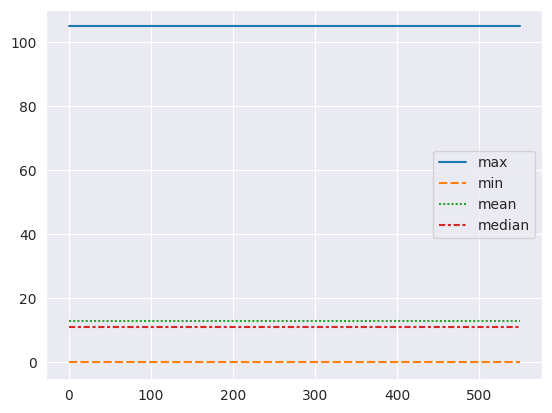

In [32]:
url = "https://raw.githubusercontent.com/OlegAndrienko/HW2_DS/main/bestsellers.csv"
data = pd.read_csv(url)

# створити датасет Автор Рейтинг

x = data["Price"].max()
y = data["Price"].min()
m = data["Price"].mean()
k = data["Price"].median()

data_set = pd.DataFrame({"max": x, "min": y, "mean": m, "median": k}, index=data.index)


#Візуалізація даних з використанням бібліотеки seaborn лінійна діаграма

sns.set_style("darkgrid")
sns.lineplot(
            data=data_set,

)

plt.show()


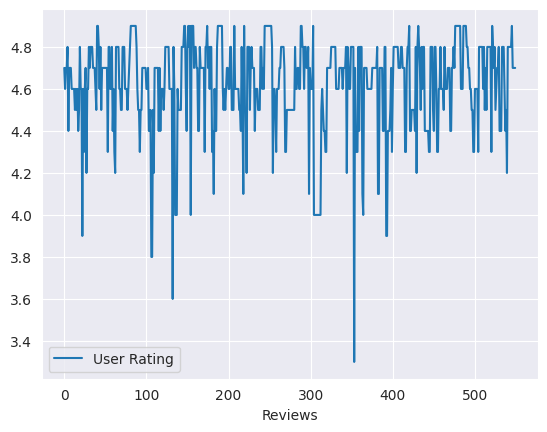

In [33]:
x_1 = data["User Rating"].index
y_1 = data["User Rating"].values
x_2 = data["Reviews"].index
y_2 = data["Reviews"].values

sns.set_style("darkgrid")
data_set = pd.DataFrame({"User Rating": y_1}, index=x_1)

sns.lineplot(
            data=data_set,
)

xlabel = plt.xlabel("User Rating")
ylabel = plt.xlabel("Reviews")
plt.show()